In [1]:
from typing import Dict, List

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rc("axes", titlesize=18)
plt.rc("axes", labelsize=14)
plt.rc("xtick", labelsize=13)
plt.rc("ytick", labelsize=13)
plt.rc("legend", fontsize=13)
plt.rc("font", size=13)

In [2]:
df = pd.read_csv("tabular_masterspreadsheet.csv")
df.head()

,Unnamed: 0,agents,decay_limit,discount_rate,epsilon,epsilon_decay,learning_rate,lookback,tn_mean_score,tn_mean_time,tn_rank,tr_cooperation_percentage,tr_cumul_regret,tr_cumul_reward,tr_defection_percentage,tr_final_loss,tr_mean_reward
0,0,"TitForTat,Nydegger,Downing,TidemanAndChieruzzi...",NaN,0.99,0.10,0.0,0.01,1.0,676.577419,1.220324,25.0,0.673646,252456.0,587544.0,0.326354,NaN,2.098371
1,1,"TitForTat,Nydegger,Downing,TidemanAndChieruzzi...",NaN,0.95,0.10,0.0,0.01,1.0,734.677419,1.332400,21.0,0.868100,199118.0,640882.0,0.131900,NaN,2.288864
2,2,"TitForTat,Nydegger,Downing,TidemanAndChieruzzi...",NaN,0.99,0.20,0.0,0.01,1.0,684.843548,1.657632,24.0,0.751871,222164.0,617836.0,0.248129,NaN,2.206557
3,3,"TitForTat,Nydegger,Downing,TidemanAndChieruzzi...",NaN,0.95,0.20,0.0,0.01,1.0,688.179032,5.635899,25.0,0.851932,192483.0,647517.0,0.148068,NaN,2.312561
4,4,"TitForTat,Nydegger,Downing,TidemanAndChieruzzi...",NaN,0.99,0.01,0.0,0.01,1.0,757.864516,2.086864,9.0,0.880529,189492.0,650508.0,0.119471,NaN,2.323243


In [3]:
df = df.drop("Unnamed: 0", axis=1)

In [4]:
def plot_histogram(x: pd.DataFrame, bins: int, x_label: str, y_label: str, title: str) -> None:
    plt.figure(figsize=(15,8))
    ax = plt.gca()
    x.hist(ax=ax, bins=bins, density=True, color="xkcd:azure")
    x.plot.kde(ax=ax, color="xkcd:tangerine")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    plt.xlim([x.min(), x.max()])

In [5]:
def plot_linegraph(x: Dict[float, List[float]], xlabel: str, ylabel: str, title: str) -> None:
    plt.figure(figsize=(15,8))
    df_x = pd.DataFrame(data=x)
    plt.plot(df_x[xlabel], df_x[ylabel])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

<h1>Does epsilon affect agent performance?</h1>

In [6]:
df_expl_1 = df[df["epsilon"] == 0.1]
df_expl_2 = df[df["epsilon"] == 0.2]
df_expl_3 = df[df["epsilon"] == 0.3]
df_expl_01 = df[df["epsilon"] == 0.01]

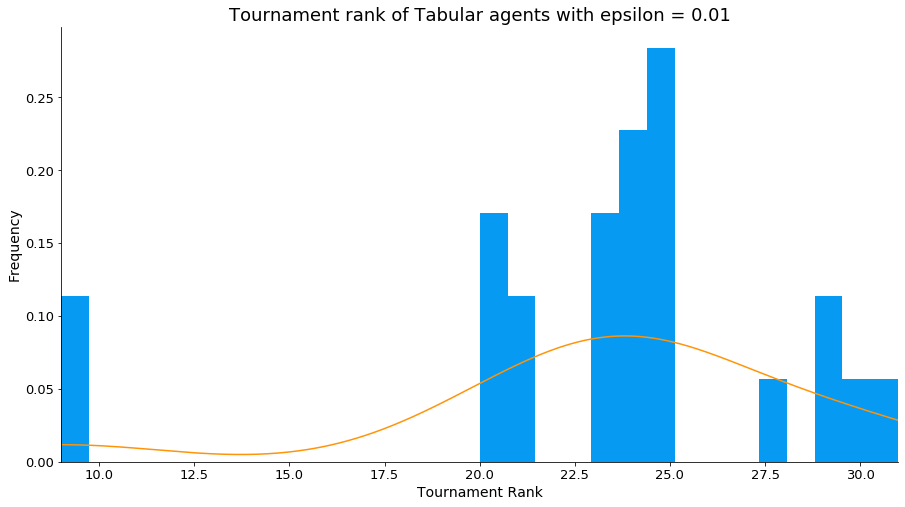

In [7]:
plot_histogram(df_expl_01["tn_rank"], 30, "Tournament Rank", "Frequency", "Tournament rank of Tabular agents with epsilon = 0.01")

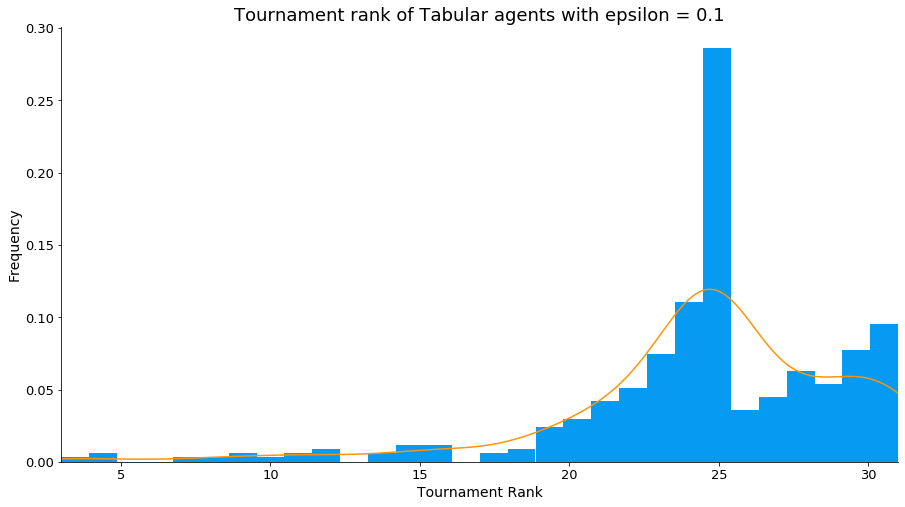

In [8]:
plot_histogram(df_expl_1["tn_rank"], 30, "Tournament Rank", "Frequency", "Tournament rank of Tabular agents with epsilon = 0.1")

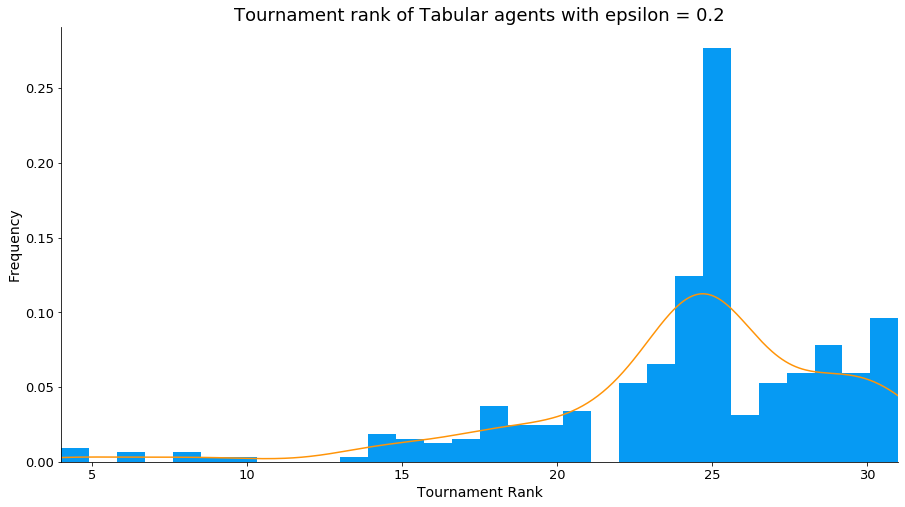

In [9]:
plot_histogram(df_expl_2["tn_rank"], 30, "Tournament Rank", "Frequency", "Tournament rank of Tabular agents with epsilon = 0.2")

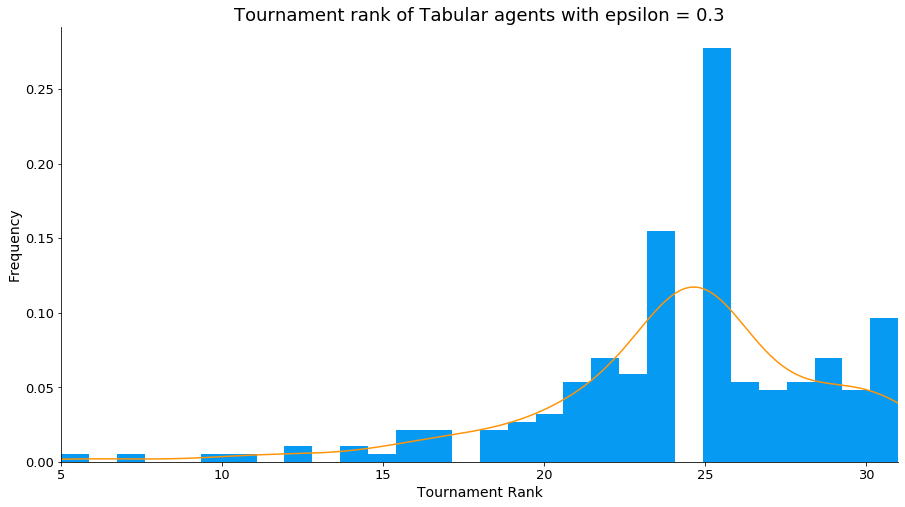

In [10]:
plot_histogram(df_expl_3["tn_rank"], 30, "Tournament Rank", "Frequency", "Tournament rank of Tabular agents with epsilon = 0.3")

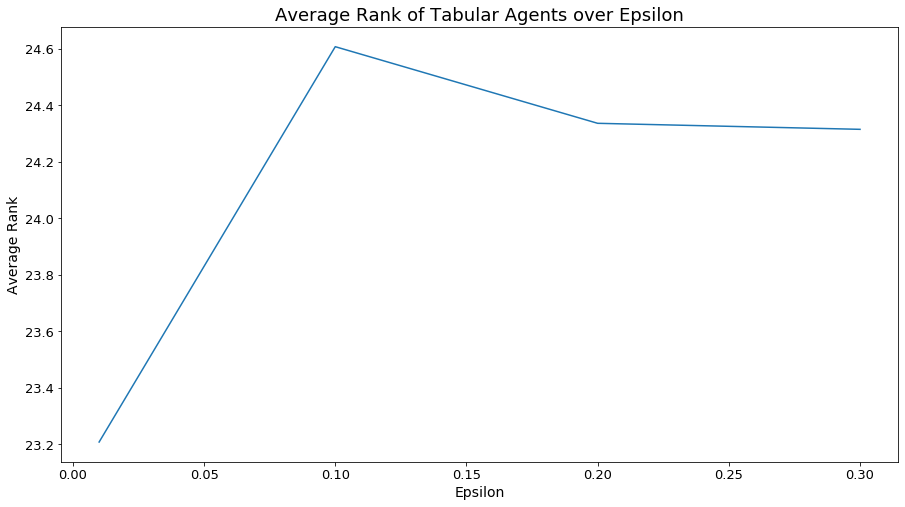

In [11]:
avg_expl = { "Epsilon" : [0.01, 0.1, 0.2, 0.3],
             "Average Rank" : [df_expl_01["tn_rank"].sum() / len(df_expl_01),
                               df_expl_1["tn_rank"].sum() / len(df_expl_1),
                               df_expl_2["tn_rank"].sum() / len(df_expl_2),
                               df_expl_3["tn_rank"].sum() / len(df_expl_3)]
           }
plot_linegraph(avg_expl, "Epsilon", "Average Rank", "Average Rank of Tabular Agents over Epsilon")

It seems as though a really low exploration rate might actually be the best choice. 

<h1>Does Discount Factor affect model performance?</h1>

In [12]:
df_dis_9 = df[df["discount_rate"] == 0.9]
df_dis_95 = df[df["discount_rate"] == 0.95]
df_dis_99 = df[df["discount_rate"] == 0.99]

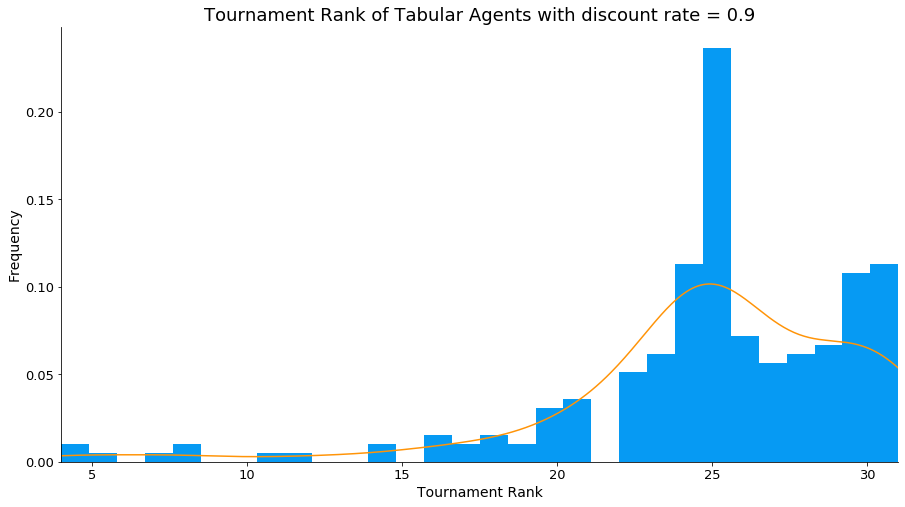

In [13]:
plot_histogram(df_dis_9["tn_rank"], 30, "Tournament Rank", "Frequency", "Tournament Rank of Tabular Agents with discount rate = 0.9")

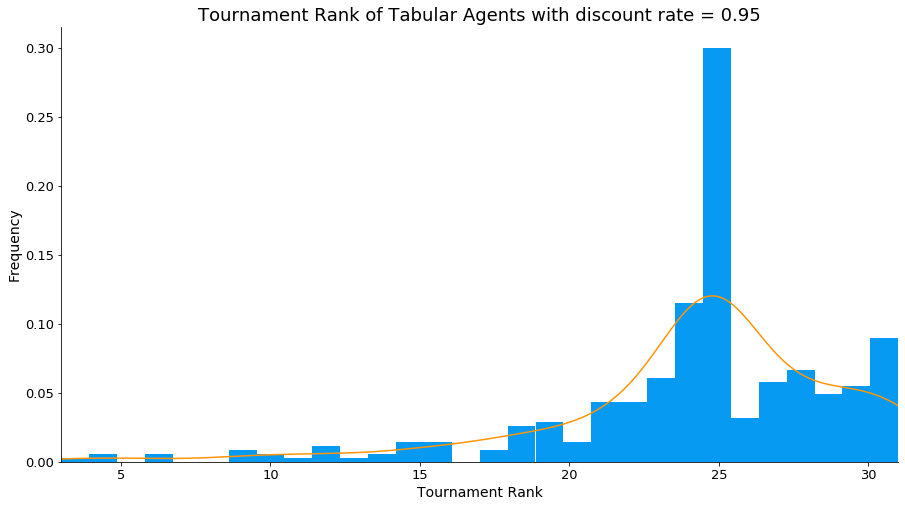

In [14]:
plot_histogram(df_dis_95["tn_rank"], 30, "Tournament Rank", "Frequency", "Tournament Rank of Tabular Agents with discount rate = 0.95")

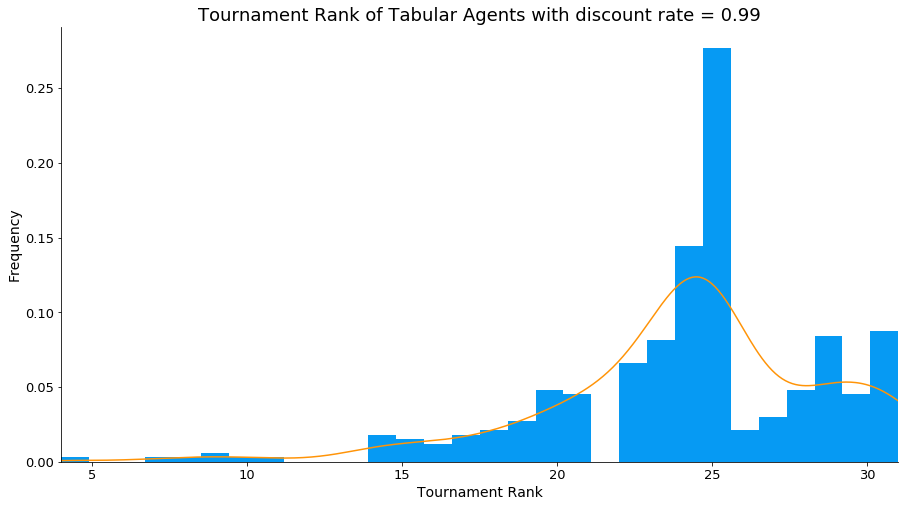

In [15]:
plot_histogram(df_dis_99["tn_rank"], 30, "Tournament Rank", "Frequency", "Tournament Rank of Tabular Agents with discount rate = 0.99")

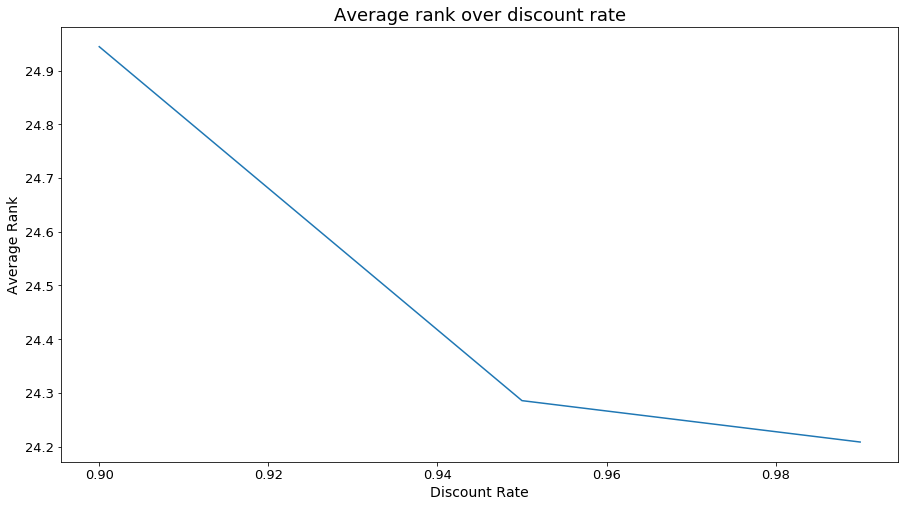

In [16]:
avg_disc = {"Discount Rate": [0.9, 0.95, 0.99],
            "Average Rank": [
                df_dis_9["tn_rank"].sum() / len(df_dis_9),
                df_dis_95["tn_rank"].sum() / len(df_dis_95),
                df_dis_99["tn_rank"].sum() / len(df_dis_99)
            ]}
plot_linegraph(avg_disc, "Discount Rate", "Average Rank", "Average rank over discount rate")

Looks like the higher the discount rate, the better the performance.

<h1>Does lookback affect model performance?</h1>

In [17]:
df["lookback"].value_counts()

2.0     179
4.0     173
8.0     172
10.0    168
1.0     144
6.0     120
Name: lookback, dtype: int64

In [18]:
df_lb_1 = df[df["lookback"] == 1]
df_lb_2 = df[df["lookback"] == 2]
df_lb_4 = df[df["lookback"] == 4]
df_lb_6 = df[df["lookback"] == 6]
df_lb_8 = df[df["lookback"] == 8]
df_lb_10 = df[df["lookback"] == 10]

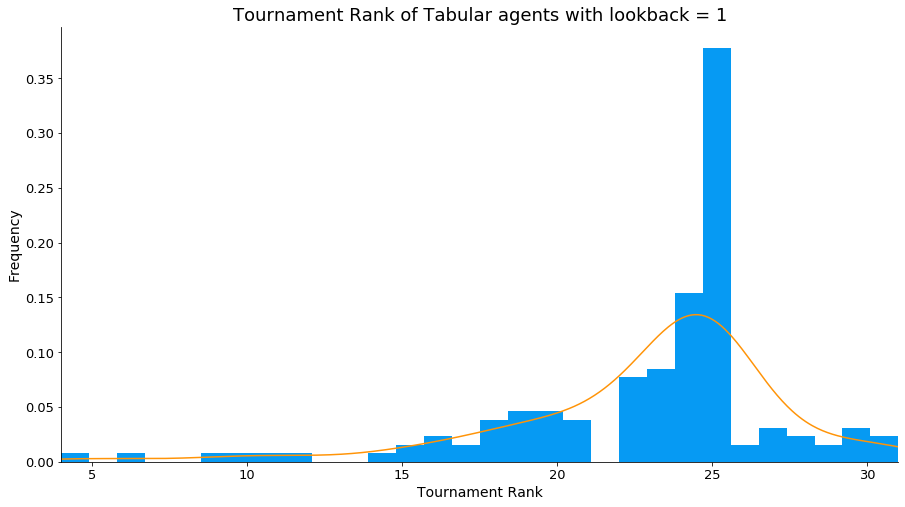

In [19]:
plot_histogram(df_lb_1["tn_rank"], 30, "Tournament Rank", "Frequency", "Tournament Rank of Tabular agents with lookback = 1")

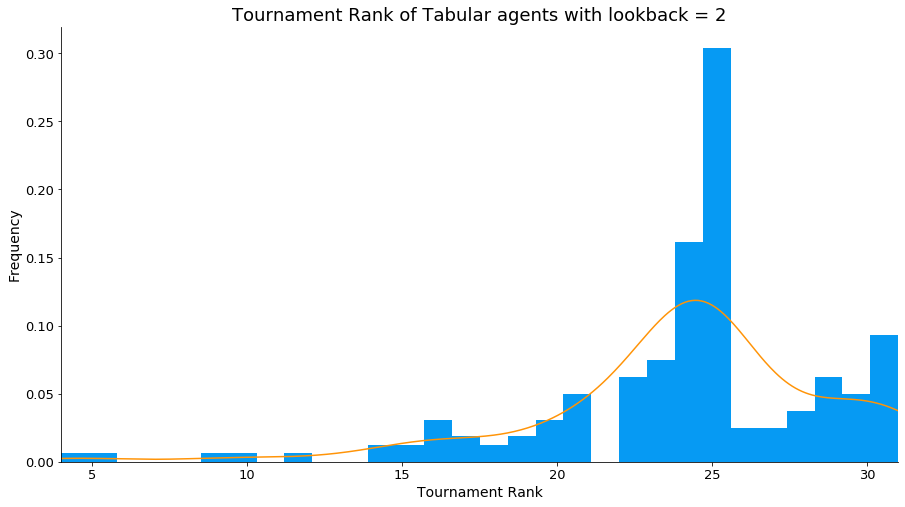

In [20]:
plot_histogram(df_lb_2["tn_rank"], 30, "Tournament Rank", "Frequency", "Tournament Rank of Tabular agents with lookback = 2")

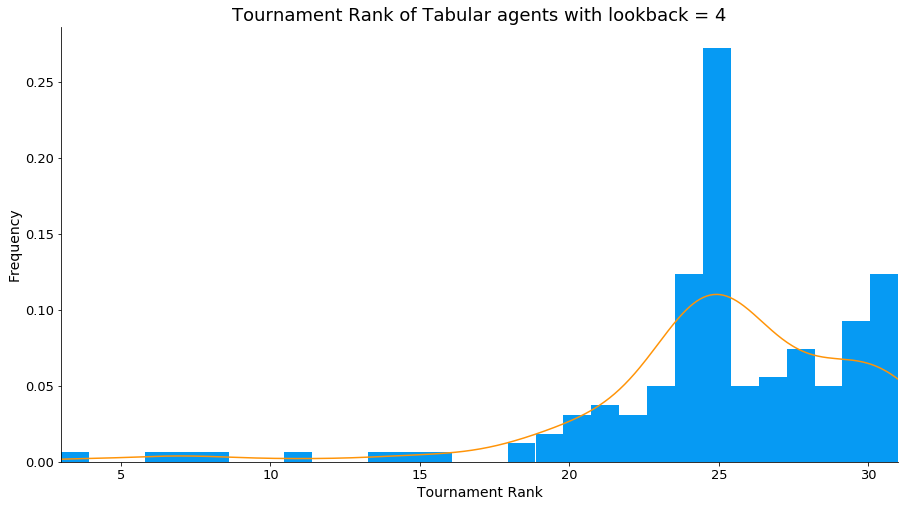

In [21]:
plot_histogram(df_lb_4["tn_rank"], 30, "Tournament Rank", "Frequency", "Tournament Rank of Tabular agents with lookback = 4")

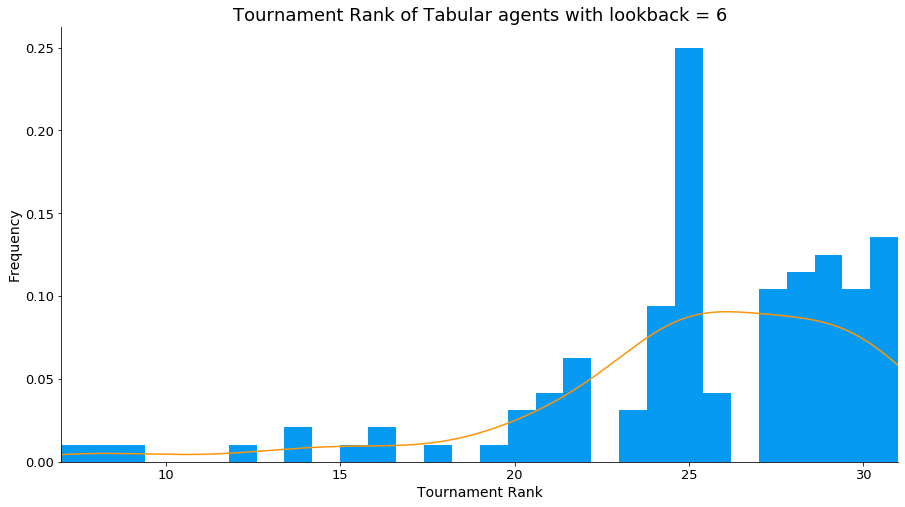

In [22]:
plot_histogram(df_lb_6["tn_rank"], 30, "Tournament Rank", "Frequency", "Tournament Rank of Tabular agents with lookback = 6")

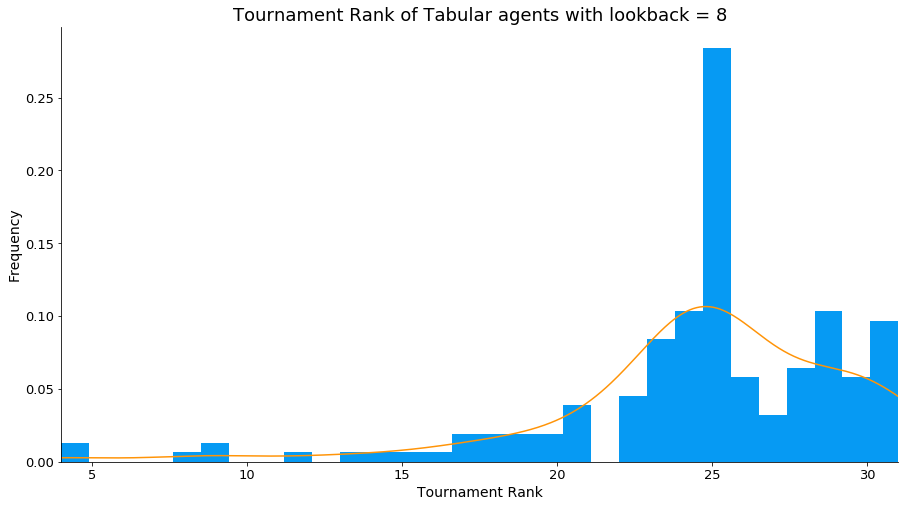

In [23]:
plot_histogram(df_lb_8["tn_rank"], 30, "Tournament Rank", "Frequency", "Tournament Rank of Tabular agents with lookback = 8")

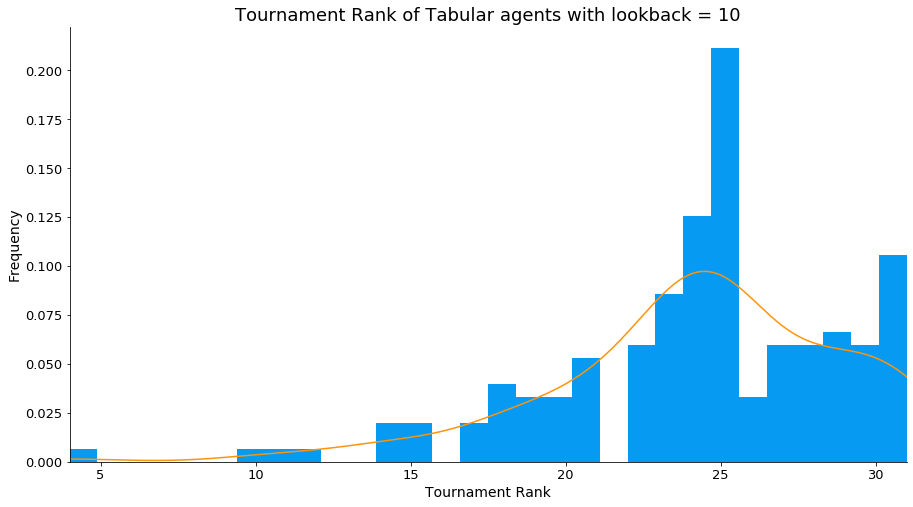

In [24]:
plot_histogram(df_lb_10["tn_rank"], 30, "Tournament Rank", "Frequency", "Tournament Rank of Tabular agents with lookback = 10")

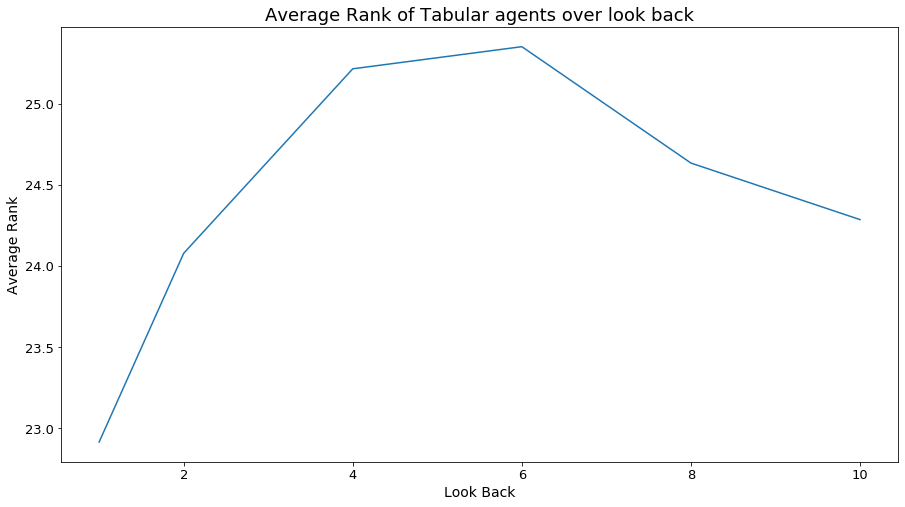

In [25]:
avg_lb = {"Look Back" : [1, 2, 4, 6, 8, 10],
          "Average Rank" : [
              df_lb_1["tn_rank"].sum() / len(df_lb_1),
              df_lb_2["tn_rank"].sum() / len(df_lb_2),
              df_lb_4["tn_rank"].sum() / len(df_lb_4),
              df_lb_6["tn_rank"].sum() / len(df_lb_6),
              df_lb_8["tn_rank"].sum() / len(df_lb_8),
              df_lb_10["tn_rank"].sum() / len(df_lb_10),
          ]}
plot_linegraph(avg_lb, "Look Back", "Average Rank", "Average Rank of Tabular agents over look back")

<h1>Does Learning Rate affect performance?</h1>

In [26]:
df["learning_rate"].value_counts()

0.010    480
0.100    380
0.001     96
Name: learning_rate, dtype: int64

In [27]:
df_lr_01 = df[df["learning_rate"] == 0.01]
df_lr_1 = df[df["learning_rate"] == 0.1]
df_lr_001 = df[df["learning_rate"] == 0.001]

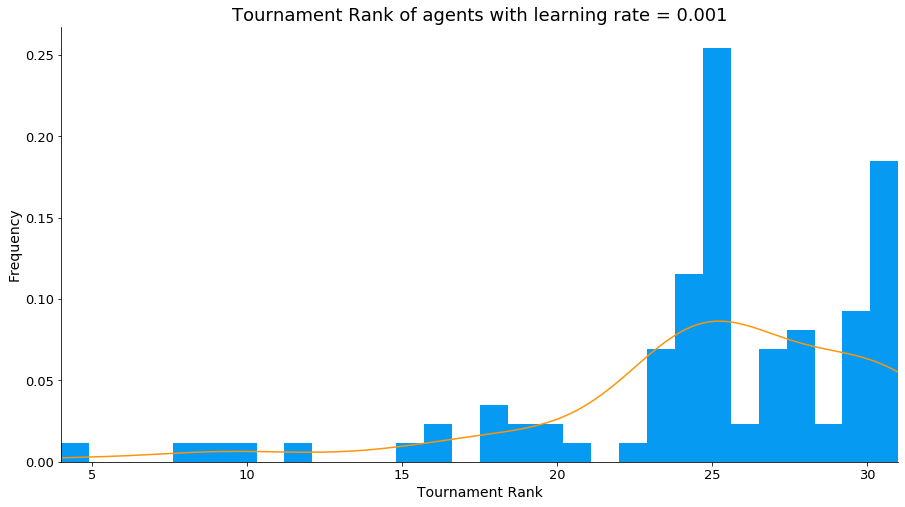

In [28]:
plot_histogram(df_lr_001["tn_rank"], 30, "Tournament Rank", "Frequency", "Tournament Rank of agents with learning rate = 0.001")

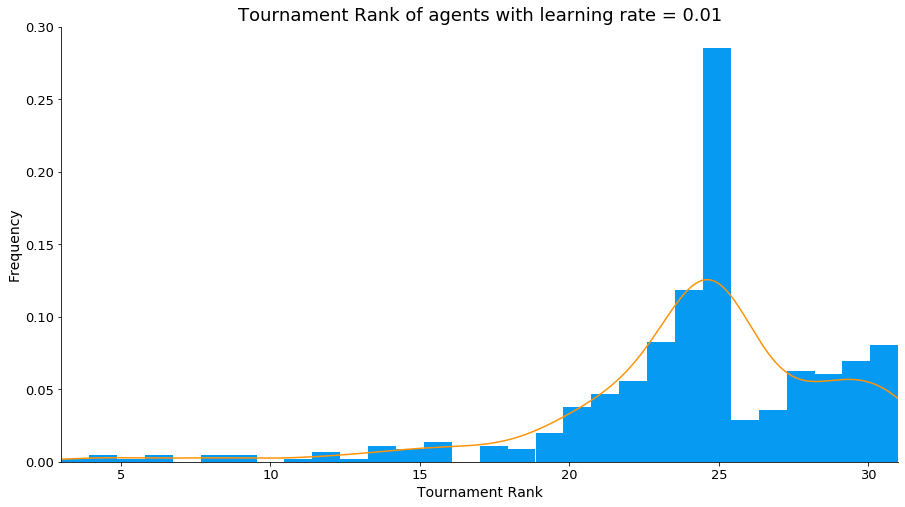

In [29]:
plot_histogram(df_lr_01["tn_rank"], 30, "Tournament Rank", "Frequency", "Tournament Rank of agents with learning rate = 0.01")

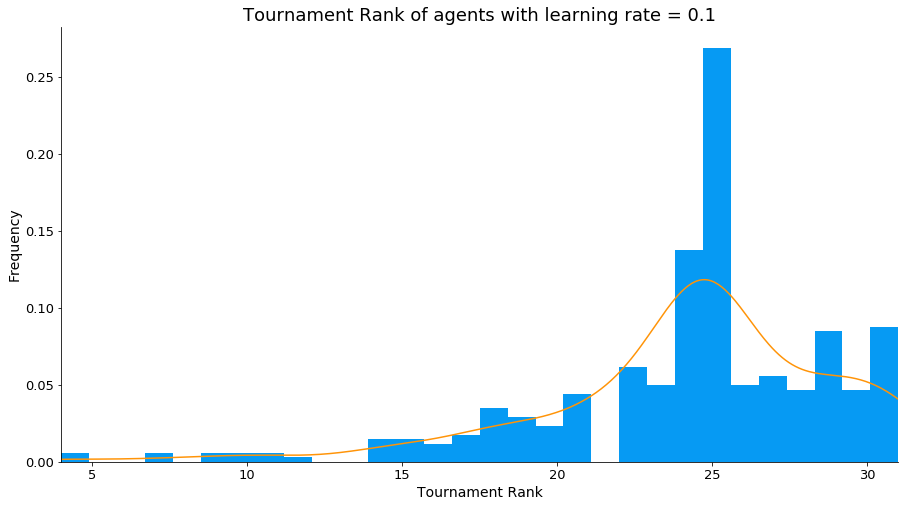

In [30]:
plot_histogram(df_lr_1["tn_rank"], 30, "Tournament Rank", "Frequency", "Tournament Rank of agents with learning rate = 0.1")

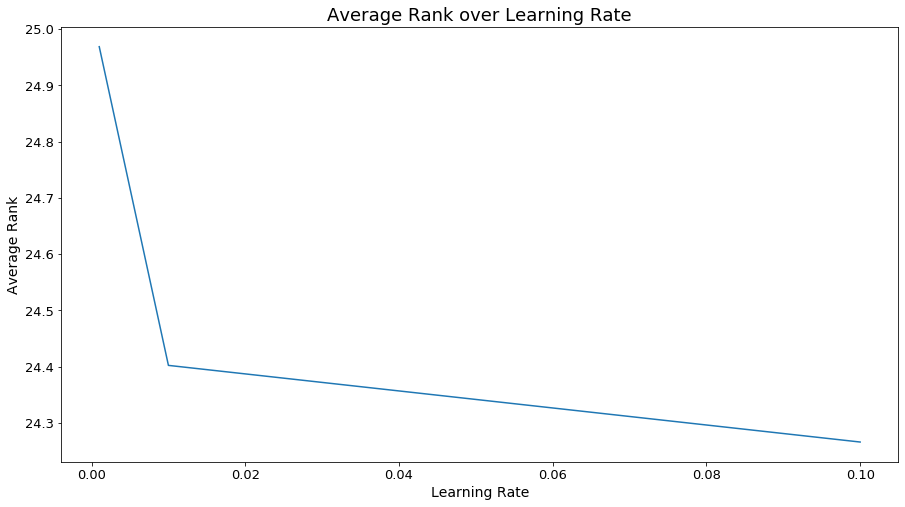

In [31]:
avg_lr = {"Learning Rate" : [0.001, 0.01, 0.1],
          "Average Rank" : [
              df_lr_001["tn_rank"].sum() / len(df_lr_001),
              df_lr_01["tn_rank"].sum() / len(df_lr_01),
              df_lr_1["tn_rank"].sum() / len(df_lr_1),
          ]}

plot_linegraph(avg_lr, "Learning Rate", "Average Rank", "Average Rank over Learning Rate")

In [32]:
len(df_lr_01)

480

<h1>Any trends between top 5 and bottom 5?</h1>

In [33]:
df_top_5 = df[df["tn_rank"] <= 5]
df_top_5

,agents,decay_limit,discount_rate,epsilon,epsilon_decay,learning_rate,lookback,tn_mean_score,tn_mean_time,tn_rank,tr_cooperation_percentage,tr_cumul_regret,tr_cumul_reward,tr_defection_percentage,tr_final_loss,tr_mean_reward
104,"TitForTat,Nydegger,TidemanAndChieruzzi,Champio...",NaN,0.90,0.3,0.0,0.010,2.0,786.174194,1.335971,5.0,0.796040,78132.0,521868.0,0.203960,NaN,2.609340
272,"TitForTat,Nydegger,Downing,TidemanAndChieruzzi...",NaN,0.90,0.1,0.0,0.010,10.0,790.324194,2.755180,4.0,0.573829,255588.0,584412.0,0.426171,NaN,2.087186
368,"TitForTat,Nydegger,TidemanAndChieruzzi,Champio...",NaN,0.90,0.2,0.0,0.010,8.0,806.458064,1.161629,4.0,0.562133,185403.0,534597.0,0.437867,NaN,2.227488
542,"TitForTat,Nydegger,Champion,Borufsen,SecondByG...",NaN,0.95,0.1,0.0,0.010,4.0,802.832258,0.928420,3.0,0.584515,93051.0,506949.0,0.415485,NaN,2.534745
617,"TitForTat,Nydegger,TidemanAndChieruzzi,Champio...",NaN,0.95,0.1,0.0,0.100,1.0,773.079032,1.526662,4.0,0.776436,96664.0,743336.0,0.223564,NaN,2.654771
771,"TitForTat,OmegaTFT,AllC,AllD",0.05,0.95,0.2,0.0,0.001,2.0,808.569355,1.067065,4.0,0.252581,192132.0,287868.0,0.747419,NaN,1.799175
944,TitForTat,0.05,0.99,0.2,0.0,0.100,8.0,827.224194,0.934071,4.0,0.877768,303650.0,5696350.0,0.122232,NaN,2.848175


In [34]:
for r_idx, row in df_top_5.iterrows():
    print(row["agents"])

TitForTat,Nydegger,TidemanAndChieruzzi,Champion,GraaskampAndKatzen
TitForTat,Nydegger,Downing,TidemanAndChieruzzi,Champion,Borufsen,GraaskampAndKatzen
TitForTat,Nydegger,TidemanAndChieruzzi,Champion,Borufsen,GraaskampAndKatzen
TitForTat,Nydegger,Champion,Borufsen,GraaskampAndKatzen
TitForTat,Nydegger,TidemanAndChieruzzi,Champion,Borufsen,GraaskampAndKatzen,Grofman
TitForTat,OmegaTFT,AllC,AllD
TitForTat


In [43]:
df[df["agents"] == "TitForTat"]["tn_rank"].sum() / len(df[df["agents"] == "TitForTat"]["tn_rank"])

23.183333333333334

In [35]:
df_bottom_5 = df[df["tn_rank"] > 25]

Text(0, 0.5, 'Count')

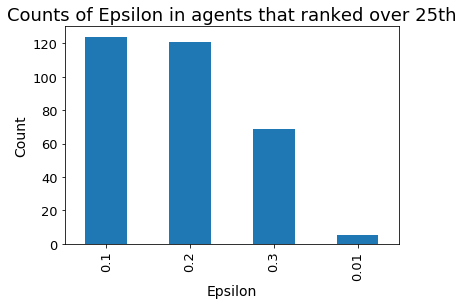

In [36]:
df_bottom_5["epsilon"].value_counts().plot(kind="bar")
plt.title("Counts of Epsilon in agents that ranked over 25th")
plt.xlabel("Epsilon")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

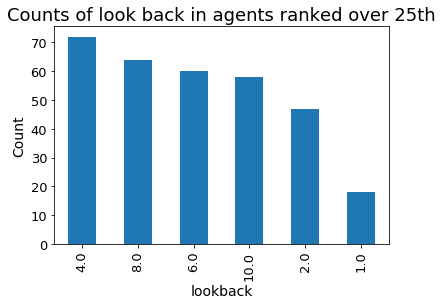

In [37]:
df_bottom_5["lookback"].value_counts().plot(kind="bar")
plt.title("Counts of look back in agents ranked over 25th")
plt.xlabel("lookback")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

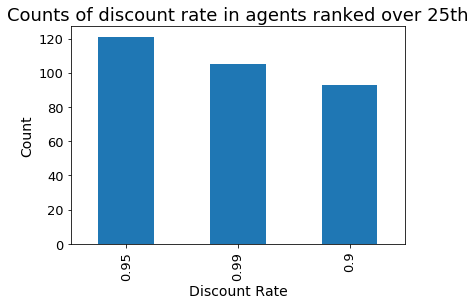

In [38]:
df_bottom_5["discount_rate"].value_counts().plot(kind="bar")
plt.title("Counts of discount rate in agents ranked over 25th")
plt.xlabel("Discount Rate")
plt.ylabel("Count")

In [39]:
df_bottom_5.head()

,agents,decay_limit,discount_rate,epsilon,epsilon_decay,learning_rate,lookback,tn_mean_score,tn_mean_time,tn_rank,tr_cooperation_percentage,tr_cumul_regret,tr_cumul_reward,tr_defection_percentage,tr_final_loss,tr_mean_reward
12,"TitForTat,Nydegger,Downing,TidemanAndChieruzzi...",NaN,0.99,0.10,0.0,0.01,4.0,442.172581,4.015827,29.0,0.505911,236226.0,603774.0,0.494089,NaN,2.156336
14,"TitForTat,Nydegger,Downing,TidemanAndChieruzzi...",NaN,0.99,0.20,0.0,0.01,4.0,448.704839,2.940299,28.0,0.630057,212580.0,627420.0,0.369943,NaN,2.240786
17,"TitForTat,Nydegger,Downing,TidemanAndChieruzzi...",NaN,0.95,0.01,0.0,0.01,4.0,445.141935,3.540019,28.0,0.504264,234231.0,605769.0,0.495736,NaN,2.163461
19,"TitForTat,Nydegger,Downing,TidemanAndChieruzzi...",NaN,0.95,0.10,0.0,0.01,6.0,447.316129,4.254432,28.0,0.583482,200335.0,639665.0,0.416518,NaN,2.284518
27,"TitForTat,Nydegger,Downing,TidemanAndChieruzzi...",NaN,0.95,0.20,0.0,0.01,8.0,434.364516,2.942577,31.0,0.575414,253460.0,586540.0,0.424586,NaN,2.094786


In [40]:
for r, row in df_bottom_5.iterrows():
    print(row["agents"])

TitForTat,Nydegger,Downing,TidemanAndChieruzzi,Champion,Borufsen,GraaskampAndKatzen
TitForTat,Nydegger,Downing,TidemanAndChieruzzi,Champion,Borufsen,GraaskampAndKatzen
TitForTat,Nydegger,Downing,TidemanAndChieruzzi,Champion,Borufsen,GraaskampAndKatzen
TitForTat,Nydegger,Downing,TidemanAndChieruzzi,Champion,Borufsen,GraaskampAndKatzen
TitForTat,Nydegger,Downing,TidemanAndChieruzzi,Champion,Borufsen,GraaskampAndKatzen
TitForTat,Nydegger,Downing,TidemanAndChieruzzi,Champion,Borufsen,GraaskampAndKatzen
TitForTat,Nydegger,Downing,TidemanAndChieruzzi,Champion,Borufsen,GraaskampAndKatzen
TitForTat,Nydegger,TidemanAndChieruzzi,Champion,Borufsen,GraaskampAndKatzen
TitForTat,Nydegger,TidemanAndChieruzzi,Champion,Borufsen,GraaskampAndKatzen
TitForTat,Nydegger,TidemanAndChieruzzi,Champion,Borufsen,GraaskampAndKatzen
TitForTat,Nydegger,TidemanAndChieruzzi,Champion,Borufsen,GraaskampAndKatzen
TitForTat,Nydegger,TidemanAndChieruzzi,Champion,Borufsen,GraaskampAndKatzen
TitForTat,Nydegger,TidemanAndChi

<h1>Which agents are good to train against?</h1>

In [70]:
df["agents"] = df["agents"].apply(lambda x : str(x).split(","))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

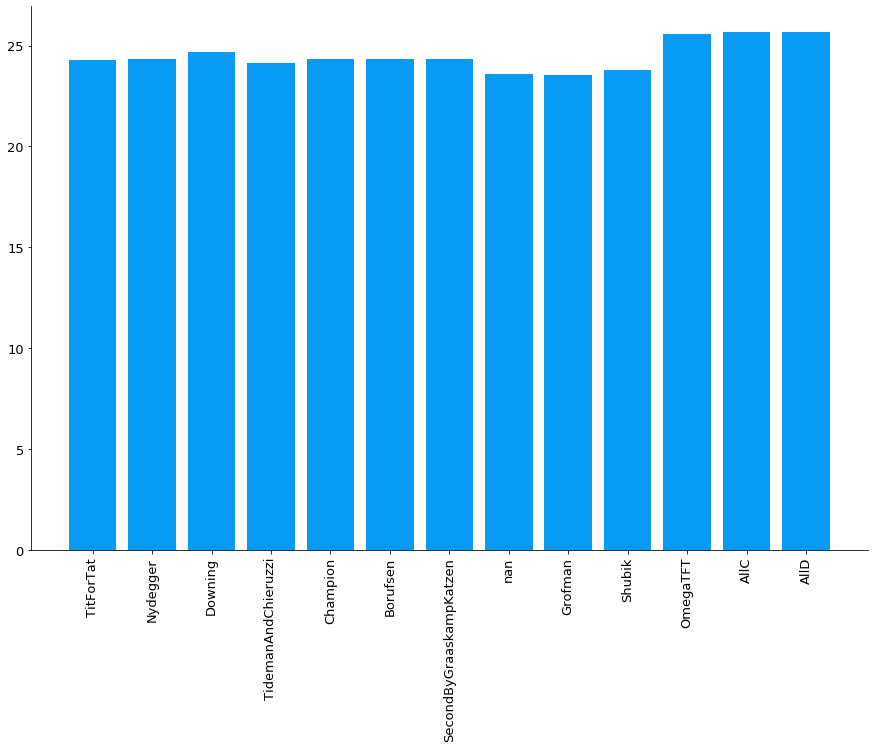

In [87]:
agents_rank = {}
total_counts_agents = {}

for r_idx, row in df.iterrows():
    for agent in row["agents"]:
        if not agent in agents_rank:
            agents_rank[agent] = row["tn_rank"]
            total_counts_agents[agent] = 1
        else:
            agents_rank[agent] += row["tn_rank"]
            total_counts_agents[agent] += 1
            
avg_ranks = {}
for agent in agents_rank:
    avg_ranks[agent] = agents_rank[agent] / total_counts_agents[agent]
plt.figure(figsize=(15,10))
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.bar(*zip(*avg_ranks.items()), color="xkcd:azure")
plt.xticks(rotation=90)